# Two Dimensinal Fluid Flow: the lid driven cavity
## Joseph E. McEwen, (c) 2018, updated 2020

![Alt Text](tracers.gif) 


This notebook provides notes and Julia code for the lid driven cavity. The great majority of this code is based off the work in [Numerical Simulations in Fluid Dynamics: a Practical Introduction](https://epubs.siam.org/doi/book/10.1137/1.9780898719703). In fact most of the code details are in the book. These notes serve as my quick reference to [Chorin projection](https://en.wikipedia.org/wiki/Projection_method_(fluid_dynamics%29).

References: 
* [Numerical Simulations in Fluid Dynamics: a Practical Introduction](https://epubs.siam.org/doi/book/10.1137/1.9780898719703)
* [Chorin Projection](https://en.wikipedia.org/wiki/Projection_method_(fluid_dynamics%29)
* [A mathematical Introduction to Fluid Dynamics](https://www.springer.com/us/book/9780387979182)



## Navier-Stokes Equations 
The [Navier-Stokes](https://en.wikipedia.org/wiki/Navier%E2%80%93Stokes_equations) equations for an incompressible fluid are
\begin{align} 
\partial_t \mathbf{U} + \mathbf{U} \cdot \boldsymbol{\nabla} \mathbf{U} = - \boldsymbol{\nabla} p + \frac{1}{Re} \nabla^2 \mathbf{U} ~,
\end{align} 

\begin{align} 
\boldsymbol{\nabla} \cdot \mathbf{U} =0 ~, 
\end{align} 
where $Re$ is the [Reynolds number](https://en.wikipedia.org/wiki/Reynolds_number) and the zero divergence of the velocity field $\mathbf{U}$ is due to incompressibility of the fluid. In two dimension the velocity field is $\mathbf{U}=(u,v)$. The 2d Navier-Stokes equations become

\begin{align} 
\begin{split} 
& \partial_t u + u \partial_x  u + v \partial_y u = - \partial_x p + Re^{-1} ( \partial_x\partial_x  + \partial_y \partial_y) u \\
&\partial_t v + u \partial_xv + v \partial_y v = - \partial_y p + Re^{-1} ( \partial_x\partial_x  + \partial_y \partial_y) v ~. 
\end{split} 
\end{align} 

### The advection terms
The divergence condition is 
\begin{align} 
\partial_x u + \partial_y v =0 ~,  
\end{align} 
or $\partial_x u  = - \partial_y v$. This can be used to rewrite the advection term. Focusing on the $u$ component in the advection term gives
\begin{align} 
\begin{split} 
u \partial_x u + v \partial_y u & = \frac{1}{2} \partial_x u^2 + v \partial_y u \\
& = \frac{1}{2} \partial_x u^2 + v \partial_y u + u \partial_x u  - u\partial_x u \\
& = \frac{1}{2} \partial_x u^2 + \frac{1}{2} \partial_x u^2 + v \partial_y u - u \partial_x u \\
& = \partial_x u^2_x + v \partial_y u + u \partial_y v \\
& = \partial_x u^2_x + \partial_y(uv) ~. 
\end{split} 
\end{align} 

A similar procedure can be used to modify the $v$ component of the advection term
\begin{align} 
v\partial_y v + v \partial_x u = \partial_y v^2 + \partial_x (uv) ~. 
\end{align} 

The above results modify the Navier-Stokes equations 
\begin{align} 
\begin{split} 
& \partial_t u + u \partial_xu^2 + \partial_y u v = - \partial_x p + Re^{-1} ( \partial_x\partial_x  + \partial_y \partial_y) u \\
&\partial_t v + u \partial_yv^2 + v \partial_x uv = - \partial_y p + Re^{-1} ( \partial_x\partial_x  + \partial_y \partial_y) v ~. 
\end{split} 
\end{align} 

### Chorin Projection
The Chorin projection method is a splitting method. An intermediate velocity $\mathbf{U}^*$ is first computed, by considering only the viscous forces. The full step is computed by updating the intermediate velocity with pressure forces.
The intermediate step computes
\begin{align} 
\mathbf{U}^* = \mathbf{U} + \Delta t\left[ \frac{1}{Re} \nabla^2 \mathbf{U} - \mathbf{U} \cdot \boldsymbol{\nabla} \mathbf{U} \right]~. 
\end{align}
The components of the intermediate velocity are $U^*_x=F, ~ U^*_y=G$, 
\begin{align} 
\begin{split} 
&F_{ij}=u_{ij} + \Delta t \left[\frac{1}{Re}\nabla^2u-\partial_x u^2 - \partial_y uv\right]_{ij}~, \\
&G_{ij}=v_{ij} + \Delta t \left[\frac{1}{Re}\nabla^2v-\partial_y v^2 - \partial_x uv\right]_{ij}~.
\end{split}
\end{align}

The full step computes 
\begin{align} 
\mathbf{U} = \mathbf{U}^* -\Delta t \boldsymbol{\nabla} p ~. 
\end{align} 
The full step velocity should be divergence free
\begin{align}
\begin{split}
\boldsymbol{\nabla} \cdot \mathbf{U} & = \boldsymbol{\nabla} \cdot \mathbf{U}^* - \Delta t \nabla^2 p  \\
& = 0~. 
\end{split} 
\end{align} 
A Poisson equation has emerged
\begin{align} 
\boldsymbol{\nabla} \cdot \mathbf{U}^* = \Delta t \nabla^2 p ~. 
\end{align} 

Once the pressure has been solved for, the full step velocity is updated by 
\begin{align} 
\mathbf{U}=\mathbf{U}^* - \Delta t \boldsymbol{\nabla}p ~. 
\end{align} 


### Boundary Conditions
The $u$ velocity on a staggered grid (see first reference for staggered grid) is not defined on the lower and upper boundaries. To apply boundary conditions for $u$ at the lower and upper boundaries, first a strip of ghost cells is added to the domain of interest on the upper and lower sections. These strips are indexed at 1 and $n_y+1$. The boundary terms for $u$ at the upper and lower domain are then taken as vertical averages. For the lower boundary the condition is 
\begin{align} 
\frac{(u_{i,1} + u_{i,2})}{2}=0 ~\leftrightarrow~ u_{i,1}=-u_{i,2} ~. 
\end{align} 
For the upper boundary the conditions is
\begin{align} 
\frac{(u_{i,n_y+1} + u_{i,n_y})}{2}=\text{(lid speed)} ~\leftrightarrow~ u_{i,n_y+1}=2\text{(lid speed)}-u_{i,n_y}~.
\end{align} 
The $v$ velocity on a staggered grid is not defined at the right and left boundaries. Following the same averaging procedure that was done for the $u$ velocity boundary, the boundary conditions are 
\begin{align} 
\begin{split} 
& \frac{(v_{1,j} + v_{2,j})}{2}=0 ~\leftrightarrow~ v_{1,j}=-v_{2,j}~, \\
& \frac{(v_{n_x,j} + v_{n_x+1,j})}{2}=0 ~\leftrightarrow~ v_{n_x+1,j}=-v_{n_x,j}~.
\end{split} 
\end{align} 

### Poisson Solution with Successive Over-Relaxation 
The Poisson equation $\boldsymbol{\nabla}\cdot \mathbf{U}^* = \Delta t \nabla^2 p $ is solved by [successive over-relaxation](https://en.wikipedia.org/wiki/Successive_over-relaxation)(SOR). Before each SOR step, boundary terms for the pressure are set. The boundary terms are set by the condition that no fluid should flow across the boundary, hence there should be no pressure gradient there. For example, the boundary term at $i=1$ is 
\begin{align} 
p_{1,j}-p_{2,j}=0 ~ \leftrightarrow ~ p_{1,j}=p_{2,j}~. 
\end{align} 
The other boundary terms follow the same argument. The SOR step is 

\begin{align} 
\begin{split} 
& \text{"set boundary terms"} \\
& p_{1,j}=p_{2,j}~, \quad p_{n_x+1,j}=p_{n_x,j}~, \quad p_{i,1}=p_{i,2} ~, \quad p_{i,n_y+1}=p_{i,n_y}~, \\
& \text{"apply SOR update"} \\
& p_{i,j} = (1-\beta)p_{i,j} + \frac{\beta}{2/\delta x^2 +2 /\delta y^2} \left( \frac{p_{i+1,j} + p_{i-1,j}}{\delta x^2} + \frac{p_{i,j+1} + p_{i,j-1}}{\delta y^2} -\Delta t^{-1}\frac{1}{\delta x}[F_{i,j}-F_{i-1,j}] - \Delta t^{-1}\frac{1}{\delta y}[G_{i,j}-G_{i,j-1}]\right) ~. 
\end{split}
\end{align} 

### Adaptive time stepping 
The time step must constrained to achieve numerial stability. There are three conditions on the time step:
\begin{align} 
\delta t < \frac{\text{Re}}{2} \left( \frac{1}{\delta x^2} + \frac{1}{\delta y^2} \right)^{-1} ~, 
\end{align} 

\begin{align} 
\delta t < \frac{\delta x}{|u_{max}|} ~, 
\end{align} 

\begin{align} 
\delta t < \frac{\delta y}{|v_{max}|} ~. 
\end{align} 

Combining all three restricitons leads to the stabiltiy expression 
\begin{align} 
\delta t = \tau \text{min} \left( \frac{\text{Re}}{2} \left( \frac{1}{\delta x^2} + \frac{1}{\delta y^2} \right)^{-1}, \frac{\delta x}{|u_{max}|} ,  \frac{\delta y}{|v_{max}|} \right) ~, 
\end{align} 
where $\tau$ is number between 0 and 1. 

In [16]:
# # import plotting library 
#free PyCall
using PyPlot
using PyCall
# #include(joinpath(dirname(JULIA_HOME),"share","julia","build_sysimg.jl")); build_sysimg(force=true)

## The code 
Below is code for the lid driven cavity problem. 
### data types 
Several Julia types hold data. These types are below and their descriptions can be access via their doc strings. 

In [17]:
"The parameters type holds immutable variables: \n
mu  1/Re \n
l_x length in x-direction \n
l_y length in y-direction \n
i_max number of points in x-direction \n
j_max number of points in y-direction \n
dx grid spacing in x-direction \n
dy grid spacing in y-direction \n
lid_speed the speed of the lid \n
x grid points in x-direction \n
y grid points in y-direction \n
max_it the maximum number of iterations for the SOR solver \n
beta SOR parameter \n
sor_tol threshold for SOR convergence \n "
struct parameters{F}
    
    mu :: F
    l_x :: F
    l_y :: F 
    i_max :: Int
    j_max :: Int
    dx :: F
    dy :: F
    lid_speed :: F

    x:: Array{F}
    y:: Array{F}

    max_it :: Int
    beta :: F
    sor_tol :: F

    function parameters{F}(Re,l_x,l_y,i_max,j_max,lid_speed,max_it,beta,sor_tol) where F
    
        dx=l_x/i_max
        dy=l_y/j_max
    
        mu=1/Re
    
        x=collect(0:i_max)*dx
        y=collect(0:j_max)*dy
    
        new{F}(mu,l_x,l_y,i_max,j_max,dx,dy,lid_speed,x,y,max_it,beta,sor_tol)
        
    end 
end;   


"
The Velocity type is a mutable type that contains data for the u and v velocities. 
"
mutable struct Velocity{F}

    u :: Array{F}
    v :: Array{F}
   
    function Velocity{F}(params) where F
    
        u=zeros(params.i_max+1,params.j_max+2)
        v=zeros(params.i_max+2,params.j_max+1)
      
        new{F}(u,v)
    end
end;

"The pressure_terms type is a mutable type that contains the pressure data, as well as the \n
varibles F, G, and rhs (right hand side) that appear in the pressue Poisson equation."
mutable struct pressure_terms{T}

    p :: Array{T}
    F :: Array{T}
    G :: Array{T}
    rhs :: Array{T}


    function pressure_terms{T}(params) where T
        
        p=zeros(params.i_max+2,params.j_max+2)
        F=zeros(params.i_max+1,params.j_max+2)
        G=zeros(params.i_max+2,params.j_max+1)
        rhs=zeros(params.i_max+2,params.j_max+2)
        
        new{T}(p,F,G,rhs)
    end
end;

"The output_terms type holds the solutions for velocities u and v and vorticity w. 
"
mutable struct output_terms{F}

    u_vec :: Array{F}
    v_vec :: Array{F}
    w :: Array{F}
    P :: Array{F}
    time :: Array{F}
   
    function output_terms{F}(n_samples,params) where F
    
        u_vec=zeros(n_samples,params.i_max+1,params.j_max+1)
        v_vec=zeros(n_samples,params.i_max+1,params.j_max+1)
        w=zeros(n_samples,params.i_max+1,params.j_max+1)
        P=zeros(n_samples,params.i_max+2,params.j_max+2)
        time=zeros(n_samples)
      
      
        new{F}(u_vec,v_vec,w,P,time)
    end
end;

# The boundary_conditions type holds data for boundary conditions. 
struct boundary_conditions{F}
    
    u_N::F
    u_S::F
    v_E::F
    v_W::F
end

**Example of access the parameters typs doc string**

In [18]:
?parameters

search: parameters



The parameters type holds immutable variables: 

mu  1/Re 

l_x length in x-direction 

l_y length in y-direction 

i_max number of points in x-direction 

j_max number of points in y-direction 

dx grid spacing in x-direction 

dy grid spacing in y-direction 

lid_speed the speed of the lid 

x grid points in x-direction 

y grid points in y-direction 

max_it the maximum number of iterations for the SOR solver 

beta SOR parameter 

sor_tol threshold for SOR convergence 


In [19]:
"Calculate time step that meets stability conditions."
function get_dt(s,mu,dx,dy,u,v)

    # tau is hard coded as .5 
    
    tau=.5
    s[1]=1. /2. /mu/(1/dx^2+1/dy^2)
    s[2]=dx/abs(maximum(u))
    s[3]=dy/abs(maximum(v))
    
    dt=tau*minimum(s)
    return dt
end
       
" 
SOR solver routine 
"
function SOR(u,v,F,G,p,beta,dt,dx,dy,nx,ny,max_it,sor_tol)
    
    den=2.0/dx^2 + 2.0/dy^2 
    
    tmp=0.0
    
    # solve for pressure with SOR routine 
    for it=1:max_it
        r=0.0
        for j=2:ny+1
        
            p[1,j]=p[2,j]
            p[nx+2,j]=p[nx+1,j]
        end
        
        for i=2:nx+1
            p[i,1]=p[i,2]
            p[i,ny+2]=p[i,ny+1]
        end
        
         
        for j=2:(ny+1), i=2:(nx+1)
                 p[i,j]=(1-beta)*p[i,j] + beta/den*( (p[i+1,j]+p[i-1,j])/dx^2+(p[i,j+1]+p[i,j-1])/dy^2-
                     (F[i,j]-F[i-1,j])/dt/dx - (G[i,j]-G[i,j-1])/dt/dy )       
        end

        
        for j=2:(ny+1), i=2:(nx+1)           
                tmp=(p[i+1,j]-2*p[i,j]+p[i-1,j])/dx^2 + (p[i,j+1]-2*p[i,j]+p[i,j-1])/dy^2 - (F[i,j]-F[i-1,j])/dt/dx -
                (G[i,j]-G[i,j-1])/dt/dy 
                r=r+tmp^2
        end
       
        r=sqrt(r)
        
        if r < sor_tol
            break
        end  
    end
end
    
"function to perform a single time step"
function step(u,v,F,G,p,bc,dt,params)
    
    # upwind parameter 
    gamma=set_gamma(u,v,dt)
    
    nx=params.i_max
    ny=params.j_max
    mu=params.mu
    dx=params.dx
    dy=params.dy
    max_it=params.max_it
    beta=params.beta
    sor_tol=params.sor_tol
    
    dt_dx=dt/dx
    dt_dy=dt/dy

    # boundary conditions
    u_N=bc.u_N
    u_S=bc.u_S
    v_E=bc.v_E
    v_W=bc.v_W

    # apply boundary conditions
    u[1:nx+1,1]=2*u_S .- u[1:nx+1,2]
  
    u[1:nx+1,ny+2]=2*u_N.-u[1:nx+1,ny+1]
    
    v[1,1:ny+1]=2*v_W.-v[2,1:ny+1]
    
    v[nx+2,1:ny+1]=2*v_E.-v[nx+1,1:ny+1]
   

    # get F 
    for j=2:ny+1 , i=2:nx
            
            F[i,j]=get_F(i,j,u,v,dx,dy,dt,mu,gamma) 
            
    end      
   
    # get G 
    for j=2:ny, i=2:nx+1
            
          G[i,j]= get_G(i,j,u,v,dx,dy,dt,mu,gamma)
    end
   
    
    # solve Poisson equation with SOR function 
    SOR(u,v,F,G,p,beta,dt,dx,dy,nx,ny,max_it,sor_tol)
        
    # update u velocity 
    for j in 2:(ny+1), i in 2:nx
    
            u[i,j]=F[i,j]-dt_dx*(p[i+1,j]-p[i,j]);
    end
    
    # update v velocity 
    for j in 2:ny, i in 2:(nx+1)
            
            v[i,j]=G[i,j]-dt_dy*(p[i,j+1]-p[i,j]);
    end

end


function get_F(i,j,u,v,dx,dy,dt,mu,gamma)
    
    du2_dx=.25/dx*( (u[i,j] + u[i+1,j])^2 - (u[i-1,j]+u[i,j])^2 )+ 
        .25*gamma/dx*(abs(u[i,j]+u[i+1,j])*(u[i,j]-u[i+1,j]) -
        abs(u[i-1,j]+u[i,j])*(u[i-1,j]-u[i,j]))
    
    duv_dy=.25/dy*( (v[i,j]+v[i+1,j])*(u[i,j]+u[i,j+1]) - 
         (v[i,j-1]+v[i+1,j-1])*(u[i,j-1]+u[i,j]) )  + 
         .25*gamma/dy*(abs(v[i,j]+v[i+1,j])*(u[i,j]-u[i,j+1])-
         abs(v[i,j-1]+v[i+1,j-1])*(u[i,j-1]-u[i,j]))
    
    d2u_dx2=(u[i+1,j]-2.0*u[i,j]+u[i-1,j])/dx^2
    
    d2u_dy2=(u[i,j+1]-2.0*u[i,j]+u[i,j-1])/dy^2
    
    return u[i,j]+ dt*(mu*(d2u_dx2 + d2u_dy2)-du2_dx-duv_dy)
 
end

function get_G(i,j,u,v,dx,dy,dt,mu,gamma)
    
    dv2_dy=.25/dx*( (v[i,j] + v[i,j+1])^2 - (v[i,j-1]+v[i,j])^2 )+ 
        .25*gamma/dx*(abs(v[i,j]+v[i,j+1])*(v[i,j]-v[i,j+1]) -
        abs(v[i,j-1]+v[i,j])*(v[i,j-1]-v[i,j]))
    
    duv_dx=.25/dy*( (u[i,j]+u[i,j+1])*(v[i,j]+v[i+1,j]) - 
         (u[i-1,j]+u[i-1,j+1])*(v[i-1,j]+v[i,j]) )  + 
         .25*gamma/dy*(abs(u[i,j]+u[i,j+1])*(v[i,j]-v[i+1,j])-
         abs(u[i-1,j]+u[i-1,j+1])*(v[i-1,j]-v[i,j]))
    
    d2v_dx2=(v[i+1,j]-2.0*v[i,j]+v[i-1,j])/dx^2
    
    d2v_dy2=(v[i,j+1]-2.0*v[i,j]+v[i,j-1])/dy^2
    
    return v[i,j]+ dt*(mu*(d2v_dx2 + d2v_dy2)-dv2_dy-duv_dx)
  
end

"function to determine the upwind parameter gamma "
function set_gamma(u,v,dt)
    return minimum([1.2*dt*maximum([maximum(abs.(u)),maximum(abs.(v))]),1.0])
    end; 

In [20]:
"Function calculates u and v velocity and vorticity w. \n
 Velocities u and v at the center of the grid by averaging the values on the \n
 staggered grid. "
function get_output(u,v,idx,output,params)
    
    nx=params.i_max
    ny=params.j_max
    dx=params.dx
    dy=params.dy
    
    for i in 1:(nx+1)
        for j in 1:(ny+1)
    
            # velocities averaged at center of grid 
            output.u_vec[idx,i,j]=0.5*(u[i,j+1]+u[i,j]);
            output.v_vec[idx,i,j]=0.5*(v[i+1,j]+v[i,j]);
                
            # vorticity     
            output.w[idx,i,j]=(u[i,j+1]-u[i,j])/2/dy-(v[i+1,j]+v[i,j])/2/dx;
        end
    end 
    
end

function get_u_vec(x,y,u,dx,dy)
    # function to interpolate velocities at inputed x-y coordinates 
    
    i=floor(x/dx)+2
    j=floor((y+.5*dy)/dy)+2
    i=Int(i)
    j=Int(j)
    
    x1=(i-2)*dx
    x2=(i-1)*dx
    y1=(j-2-.5)*dy
    y2=(j-1-.5)*dy
    
    u1=u[i-1,j-1]
    u2=u[i,j-1]
    u3=u[i-1,j]
    u4=u[i,j]
    
    return 1/dx/dy*((x2-x)*(y2-y)*u1 +(x-x1)*(y2-y)*u2 +
    (x2-x)*(y-y1)*u3 + (x-x1)*(y-y1)*u4)
    
end

function get_v_vec(x,y,v,dx,dy)
    
    i=floor((x + .5*dx)/dx)+2
    j=floor(y/dy)+2
    i=Int(i)
    j=Int(j)
    
    x1=(i-2-.5)*dx
    x2=(i-1-.5)*dx
    y1=(j-2)*dy
    y2=(j-1)*dy
    
    v1=v[i-1,j-1]
    v2=v[i,j-1]
    v3=v[i-1,j]
    v4=v[i,j]
    
    return 1.0/dx/dy*((x2-x)*(y2-y)*v1 +(x-x1)*(y2-y)*v2 +
    (x2-x)*(y-y1)*v3 + (x-x1)*(y-y1)*v4)
    
end;

In [21]:
function solve(U,P,bc,params,n_steps;downsample=1)
    
    n_store=n_steps ÷ downsample

    output=output_terms{Float64}(n_store+1,params)
    

    # s is used for time stepping condition 
    s=zeros(Float64,3)
    
    dt=0
    time=0.0

    get_output(U.u,U.v,1,output,params)
    output.time[1]=time
    output.P[1,:,:]=P.p
    
    
    i=2
    for t=1:n_steps
        
        dt=get_dt(s,params.mu,params.dx,params.dy,U.u,U.v)
        
        step(U.u,U.v,P.F,P.G,P.p,bc,dt,params)
 
        time=time+dt 
        
        if t % downsample == 0 
                get_output(U.u,U.v,i,output,params)
                output.time[i]=time
                output.P[i,:,:]=P.p
                i+=1
        end
        
         
        
    end
    return output
end;

function solve_with_particles(x_0,U,P,bc,params,n_steps;downsample=1)
    
    n_store=n_steps ÷ downsample

    output=output_terms{Float64}(n_store+1,params)
    

    # s is used for time stepping condition 
    s=zeros(Float64,3)
    
    dt=0
    time=0.0

    get_output(U.u,U.v,1,output,params)
    output.time[1]=time
    output.P[1,:,:]=P.p
    
    
    i=2
    
    X=zeros(n_store+1,size(x_0,1),2)
    x_tmp=zeros(size(x_0,1),2)
    n_particles=size(x_0,1)
    
    for i in 1:n_particles
        X[1,i,1]=x_0[i,1]
        X[1,i,2]=x_0[i,2]
    end
    
    # update particle positions in temporary array 
    for i in 1:n_particles
            
        x=x_0[i,1]
        y=x_0[i,2]
            
        x_tmp[i,1]=x+dt*get_u_vec(x,y,U.u,params.dx,params.dy)
        x_tmp[i,2]=y+dt*get_v_vec(x,y,U.v,params.dx,params.dy)
    end
    
    i=2
    for t=1:n_steps
        
        dt=get_dt(s,params.mu,params.dx,params.dy,U.u,U.v)
        
        step(U.u,U.v,P.F,P.G,P.p,bc,dt,params)
        
        
        # update particle positions
        for i in 1:n_particles
            
            x=x_tmp[i,1]
            y=x_tmp[i,2]
            
            x_tmp[i,1]=x+dt*get_u_vec(x,y,U.u,params.dx,params.dy)
            x_tmp[i,2]=y+dt*get_v_vec(x,y,U.v,params.dx,params.dy)
        end
 
        time=time+dt 
        
        if t % downsample == 0 
                get_output(U.u,U.v,i,output,params)
                output.time[i]=time
                output.P[i,:,:]=P.p
            
                X[i,:,1]=x_tmp[:,1]
                X[i,:,2]=x_tmp[:,2]
                i+=1
        end
        
         
        
    end
    return output, X
end;

In [22]:
function NS2D(Re,l_x,l_y,i_max,j_max,n_steps,lid_speed,max_it,beta,sor_tol;downsample=1)
    

    params=parameters{Float64}(Re,l_x,l_y,i_max,j_max,lid_speed,max_it,beta,sor_tol)
    U=Velocity{Float64}(params)
    P=pressure_terms{Float64}(params)
    #output=output_terms{Float64}(params)
    bc=boundary_conditions(lid_speed,0.0,0.0,0.0)

    
    output=solve(U,P,bc,params,n_steps,downsample=downsample)
    return output, params
    
end;

### Example at Reynolds number equal to 10
Below is an example at Reynolds 10. 

In [23]:
n_steps=5000

i_max=50
j_max=50
l_x=1.0
l_y=1.0
tol=.1
lid_speed=1.0
max_it=20
beta=1.7
Re=10

output, params =NS2D(Re,l_x,l_y,i_max,j_max,n_steps,lid_speed,max_it,beta,tol;downsample=10);

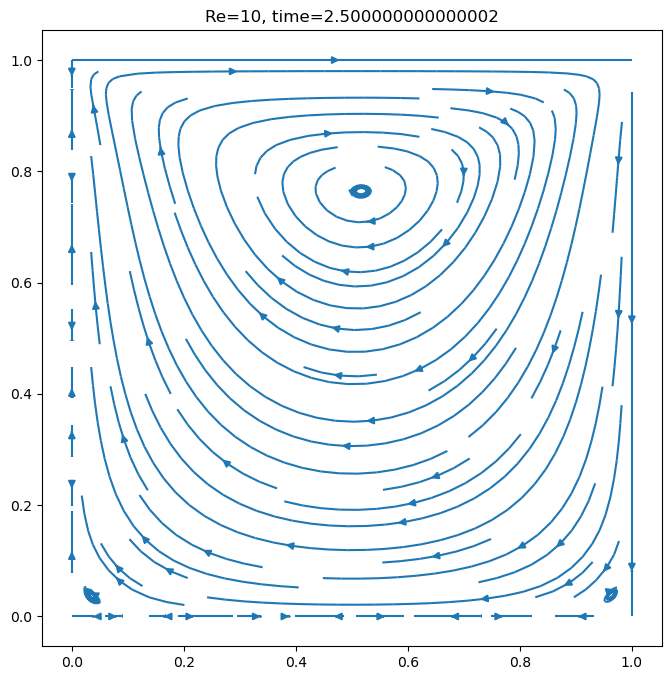

┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = top-level scope at In[24]:8
└ @ Core In[24]:8


In [24]:
fig = figure(figsize=(8,8))
subplot(111)
ax=gca()


title=string("Re=10, time=",string(output.time[end]))
streamplot(params.x,params.y,output.u_vec[end,:,:]',output.v_vec[end,:,:]')
ax[:set_title](title)
savefig("LDC_Re10_n50.pdf")

### Example at Reynolds number equal to 1000
Below is code for four different outputs at Reynolds number 1000. 

In [13]:
n_steps=5000

i_max=50
j_max=50
l_x=1.0
l_y=1.0
tol=.1
lid_speed=1.0
max_it=20
beta=1.7
Re=1000

output, params =NS2D(Re,l_x,l_y,i_max,j_max,n_steps,lid_speed,max_it,beta,tol;downsample=10);

┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = top-level scope at In[14]:9
└ @ Core In[14]:9
┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = top-level scope at In[14]:20
└ @ Core In[14]:20
┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = top-level scope at In[14]:31
└ @ Core In[14]:31
┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = top-level scope at In[14]:41
└ @ Core In[14]:41


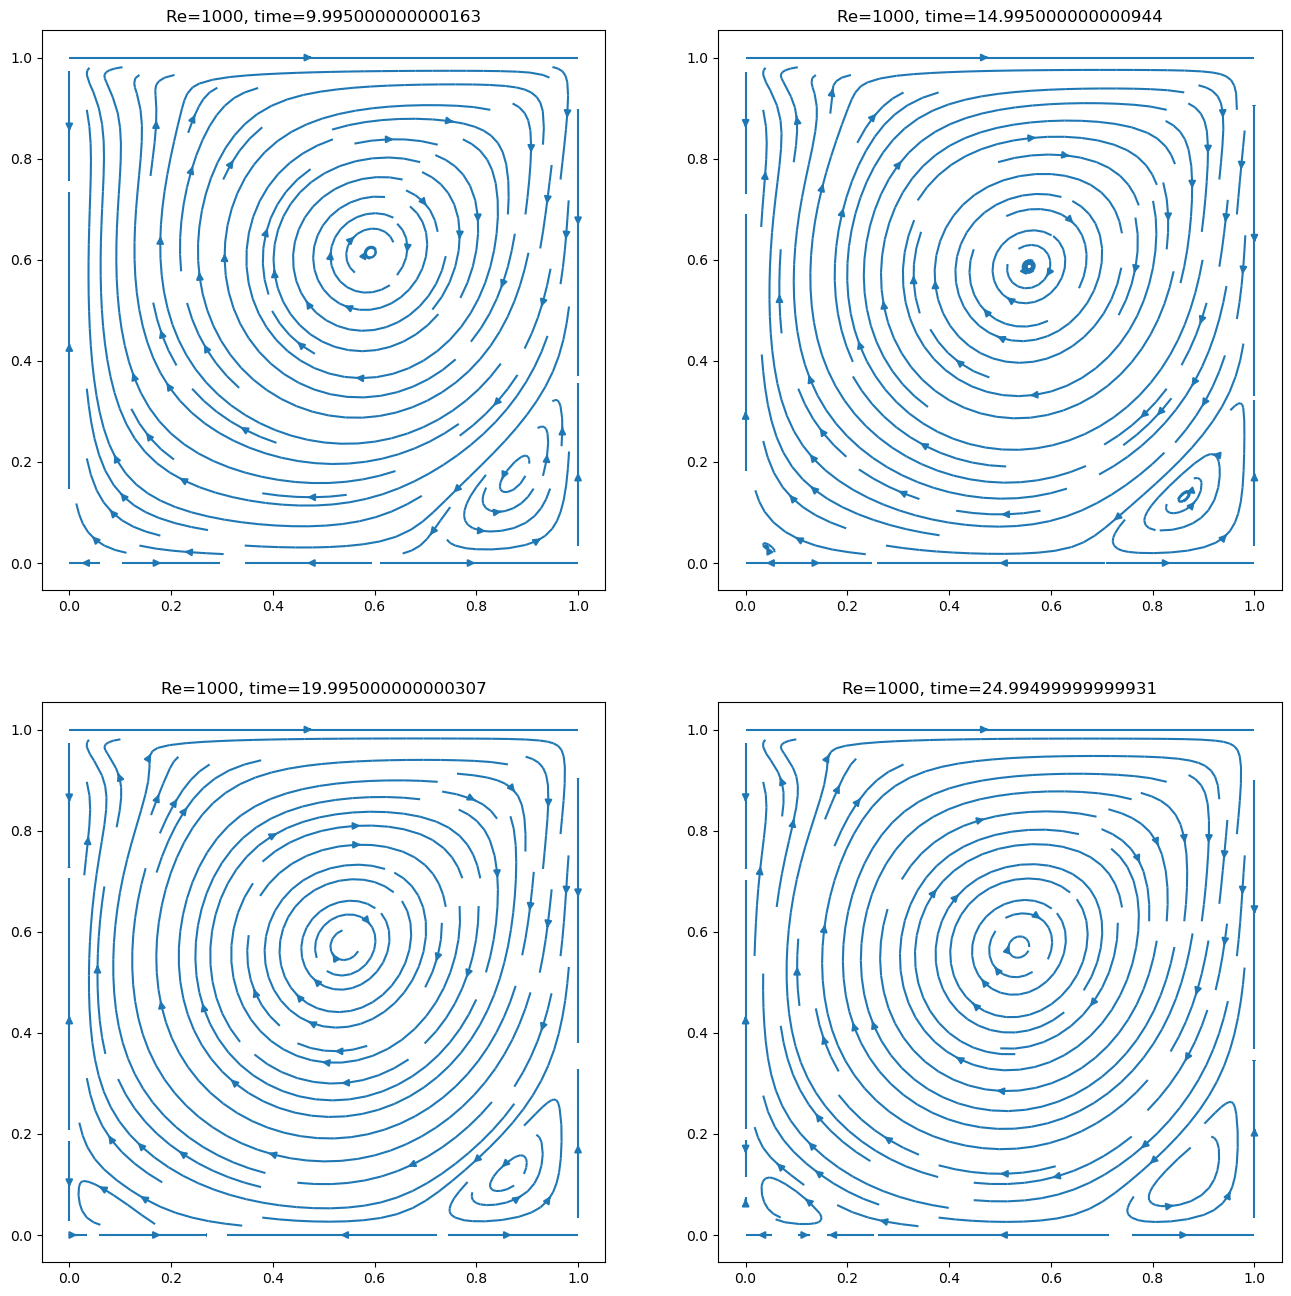

In [14]:
fig = figure(figsize=(16,16))
subplot(221)
ax=gca()

i=200
#output, U, P, bc, time1, params=NS2D(Re,l_x,l_y,i_max,j_max,n_steps,lid_speed,max_it,beta,tol;return_data=true);
title=string("Re=1000, time=",string(output.time[i]))
streamplot(params.x,params.y,output.u_vec[i,:,:]',output.v_vec[i,:,:]')
ax[:set_title](title)


subplot(222)
ax=gca()


i=300
#output, U, P, bc, time1, params=NS2D(Re,l_x,l_y,i_max,j_max,n_steps,lid_speed,max_it,beta,tol;return_data=true);
title=string("Re=1000, time=",string(output.time[i]))
streamplot(params.x,params.y,output.u_vec[i,:,:]',output.v_vec[i,:,:]')
ax[:set_title](title)


subplot(223)
ax=gca()


i=400
#output, U, P, bc, time1, params=NS2D(Re,l_x,l_y,i_max,j_max,n_steps,lid_speed,max_it,beta,tol;return_data=true);
title=string("Re=1000, time=",string(output.time[i]))
streamplot(params.x,params.y,output.u_vec[i,:,:]',output.v_vec[i,:,:]')
ax[:set_title](title)


subplot(224)
ax=gca()

i=500
#output, U, P, bc, time1, params=NS2D(Re,l_x,l_y,i_max,j_max,n_steps,lid_speed,max_it,beta,tol;return_data=true);
title=string("Re=1000, time=",string(output.time[i]))
streamplot(params.x,params.y,output.u_vec[i,:,:]',output.v_vec[i,:,:]')
ax[:set_title](title)

savefig("LDC_Re1000_n50_4plot_v2.pdf")

### Example on rectangular grid. 

In [25]:
n_steps=5000
Re=1000
i_max=100
j_max=50
l_x=1
l_y=.5
tol=.1
lid_speed=1.0
max_it=20
beta=1.7

output, params =NS2D(Re,l_x,l_y,i_max,j_max,n_steps,lid_speed,max_it,beta,tol;downsample=40);

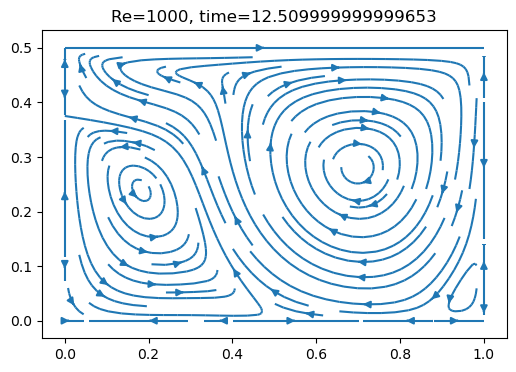

┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = top-level scope at In[26]:7
└ @ Core In[26]:7


In [26]:
fig = figure(figsize=(6,4))
subplot(111)
ax=gca()

title=string("Re=1000, time=",string(output.time[end]))
streamplot(params.x,params.y,output.u_vec[end,:,:]',output.v_vec[end,:,:]')
ax[:set_title](title)


savefig("LDC_Re1000_n100_n50_v2.pdf")

### Example plotting particle trajectories
Below is an example where the particle trajectories are plotted. 

In [31]:
n=200
z_0=randn(n,2); 

In [32]:
# initial particle positions 
x_0 = .02 .* z_0 .+ .5 ; 

In [33]:
i_max=120
j_max=120
l_x=1
l_y=1
lid_speed=1.0
max_it=20
beta=1.7
Re=10000

params_3=parameters{Float64}(Re,l_x,l_y,i_max,j_max,lid_speed,max_it,beta,.1)
U=Velocity{Float64}(params_3);
P=pressure_terms{Float64}(params_3);
bc=boundary_conditions(lid_speed,0.0,0.0,0.0);

n_steps=60000

output, X=solve_with_particles(x_0,U,P,bc,params_3,n_steps,downsample=120);

┌ Info: Saved animation to 
│   fn = /Users/joe/Desktop/Projects/fluids/tracers.gif
└ @ Plots /Users/joe/.juliapro/JuliaPro_v1.4.2-1/packages/Plots/3INZP/src/animation.jl:104


Plots.AnimatedGif("/Users/joe/Desktop/Projects/fluids/tracers.gif")
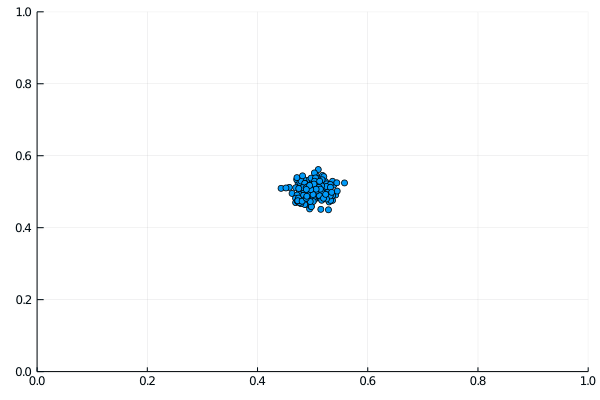

In [34]:
using Plots


x = X[:,:,1]
y = X[:,:,2]

# uncomment for gif only 
# @gif for i =1:size(X,1)
#     Plots.scatter((x[i,:], y[i,:]), lims = (0, 1), label = "")
# end

# uncomment for gif and saving gif 
anim= @animate for i =1:size(X,1)
    Plots.scatter((x[i,:], y[i,:]), lims = (0, 1), label = "")
end

#gif(anim,"tracers.mp4", fps = 15)
gif(anim,"tracers.gif", fps = 15)